<a href="https://colab.research.google.com/github/Priyadharshini0512/Medical-Diagnosis-with-Attention-Mechanism/blob/main/NLP_Ass_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


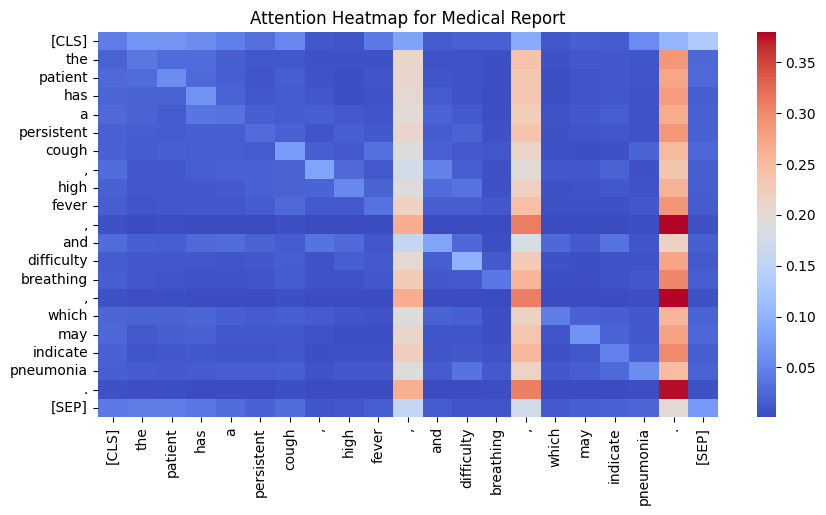

Predicted Label: 0 | Probabilities: [[0.5580291748046875, 0.4419708549976349]]


In [1]:
import torch
import transformers
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

# Load a pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2, output_attentions=True)

# Sample medical report
doc = "The patient has a persistent cough, high fever, and difficulty breathing, which may indicate pneumonia."

# Tokenize input
inputs = tokenizer(doc, return_tensors="pt", truncation=True, padding=True)
outputs = model(**inputs)

# Extract attention weights
attentions = outputs.attentions  # Tuple of attention layers
last_layer_attention = attentions[-1].squeeze(0).mean(dim=0).detach().numpy()

# Token list
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(last_layer_attention, xticklabels=tokens, yticklabels=tokens, cmap="coolwarm")
plt.title("Attention Heatmap for Medical Report")
plt.show()

# Model Prediction
logits = outputs.logits
probs = F.softmax(logits, dim=-1)
pred_label = torch.argmax(probs, dim=-1).item()
print("Predicted Label:", pred_label, "| Probabilities:", probs.tolist())
